<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02b_adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)


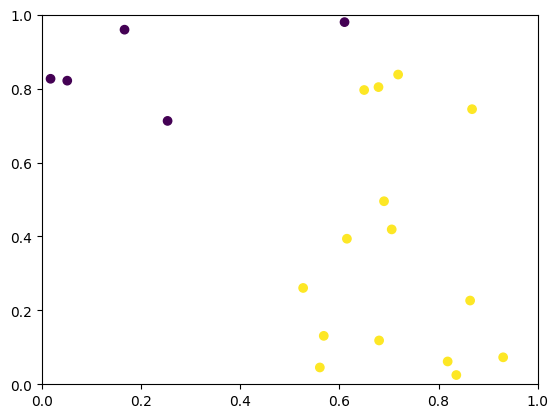

In [58]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=-0.4):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
plotDataset(X, y)
plt.show()

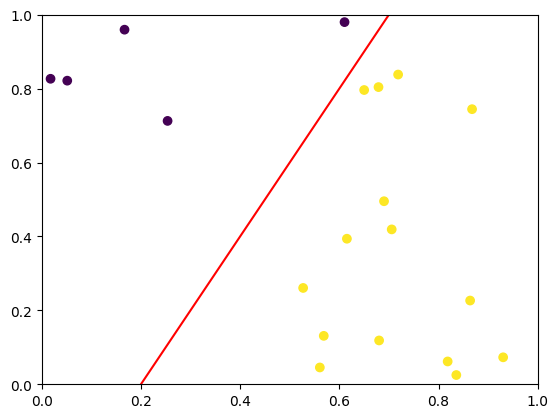

In [59]:
def plotHiperplano(vector, intercept=0):
  xs = np.array([0,1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotHiperplano([2, -1], -0.4)
plt.show()

In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1


[-0.44969176  2.22693413 -0.75082222]
0.95


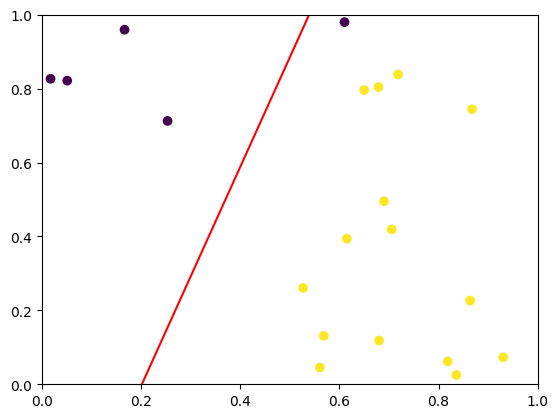

In [60]:
def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, n_iter=1000, learning_rate=0.01):
    self.n_iter = n_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(size=Xb.shape[1])*2-1
    # Widrow-Hoff
    for _ in range(self.n_iter):
      ypred = Xb @ (self.w)
      error = y-ypred
      self.w += Xb.T @ (error) * self.learning_rate
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ (self.w))

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

0.927


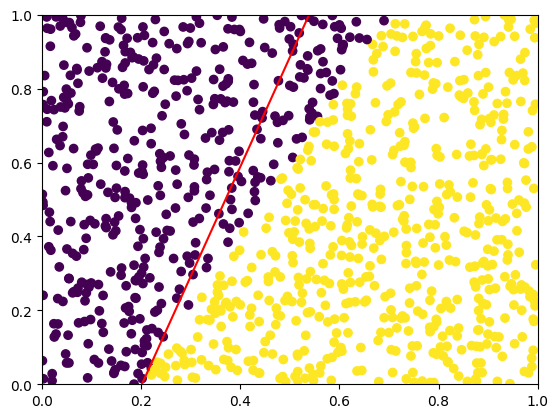

In [61]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

1.0


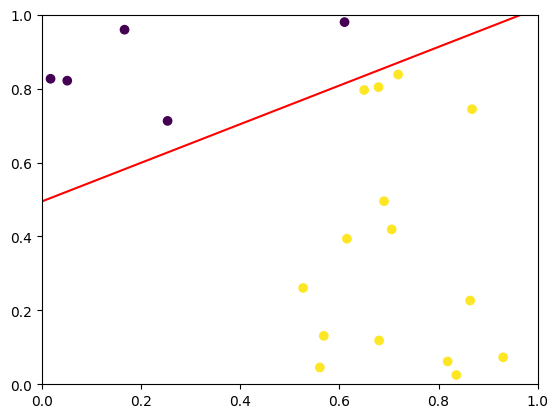

In [63]:
X_outlier = np.concatenate((X, np.array([[10,5]])))
y_outlier = np.concatenate((y, np.array([1])))
model = Perceptron()
model.fit(X_outlier, y_outlier)
ypred = model.predict(X_outlier)
print(accuracy_score(y_outlier, ypred))
plotDataset(X_outlier, y_outlier)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

0.734


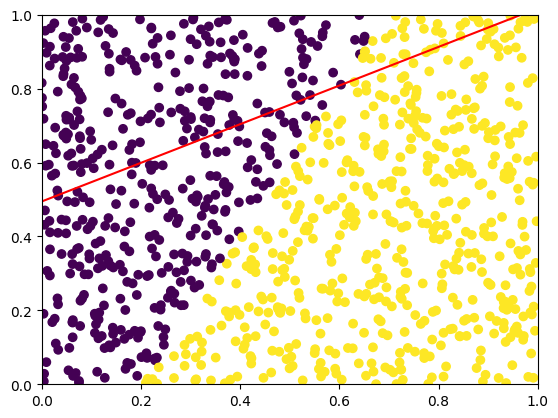

In [64]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w[1:], model.w[0])
plt.show()